In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="whitegrid")

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

# 0. Loading Data

In [3]:
df = pd.read_excel('data.xlsx', sheet_name='EFW Panel Data 2019 Report')

In [4]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Year,ISO_Code,Countries,EFW,1 Size of Government,2 Legal System & Property Rights,3 Sound Money,4 Freedom to trade internationally,5 Regulation
2,NaN,2017,ALB,Albania,7.67351,7.52817,5.06491,9.64827,8.34386,7.78235
3,NaN,2016,ALB,Albania,7.63774,7.87586,5.07181,9.55366,8.2149,7.47248
4,NaN,2015,ALB,Albania,7.63967,7.90426,5.00349,9.58563,8.10912,7.59584
...,...,...,...,...,...,...,...,...,...,...
3885,NaN,1990,ZWE,Zimbabwe,4.51614,5.10884,3.43944,5.66484,4.68962,3.95367
3886,NaN,1985,ZWE,Zimbabwe,4.22684,5.02625,2.63349,6.30585,3.16174,4.20723
3887,NaN,1980,ZWE,Zimbabwe,4.05474,6.32262,1.3796,6.34334,3.27701,3.28064
3888,NaN,1975,ZWE,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Data Cleaning

In [5]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 2'], inplace=True)

In [6]:
df.columns = df.loc[1]

In [7]:
df.drop(index=[0, 1], inplace=True)

In [8]:
new_col = []
for x in df.columns[:3]:
    new_col.append(x)
for x in df.columns[3:]:
    x = x.split(' ')[2:]
    x = ' '.join(x)
    new_col.append(x)
print(new_col)

df.columns = ['Year', 'Countries', 'EFW', 'Size of Government', 'Legal System & Property Rights', 'Sound Money', 'Freedom to trade internationally', 'Regulation']

['Year', 'Countries', 'EFW', 'Size of Government', 'Legal System & Property Rights', 'Sound Money', 'Freedom to trade internationally', 'Regulation']


In [9]:
df.isna().sum()

Year                                  0
Countries                             0
EFW                                 729
Size of Government                  737
Legal System & Property Rights      775
Sound Money                         725
Freedom to trade internationally    763
Regulation                          756
dtype: int64

In [10]:
df.dropna(axis='index', how='any', inplace=True)
df = df.reset_index()
df.drop(columns='index', inplace=True)
df

,Year,Countries,EFW,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
0,2017,Albania,7.67351,7.52817,5.06491,9.64827,8.34386,7.78235
1,2016,Albania,7.63774,7.87586,5.07181,9.55366,8.2149,7.47248
2,2015,Albania,7.63967,7.90426,5.00349,9.58563,8.10912,7.59584
3,2014,Albania,7.58677,7.88204,4.66674,9.62932,8.20863,7.54712
4,2013,Albania,7.38952,7.8079,4.54378,9.69094,7.70577,7.19922
...,...,...,...,...,...,...,...,...
3025,2000,Zimbabwe,4.29984,5.36506,4.66245,2.89117,3.22474,5.35579
3026,1995,Zimbabwe,5.51861,6.41886,5.13813,4.91529,5.83966,5.42329
3027,1990,Zimbabwe,4.51614,5.10884,3.43944,5.66484,4.68962,3.95367
3028,1985,Zimbabwe,4.22684,5.02625,2.63349,6.30585,3.16174,4.20723


In [11]:
# Counting number of countries

len(df['Countries'].unique())

166

### Adding new column - Continent

In [12]:
# Dictionary of corresponding continent to each country

null = None
continent = [{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Afghanistan, Islamic Republic of", "Country_Number": 4, "Three_Letter_Country_Code": "AFG", "Two_Letter_Country_Code": "AF"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Albania, Republic of", "Country_Number": 8, "Three_Letter_Country_Code": "ALB", "Two_Letter_Country_Code": "AL"},{"Continent_Code": "AN", "Continent_Name": "Antarctica", "Country_Name": "Antarctica (the territory South of 60 deg S)", "Country_Number": 10, "Three_Letter_Country_Code": "ATA", "Two_Letter_Country_Code": "AQ"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Algeria, People's Democratic Republic of", "Country_Number": 12, "Three_Letter_Country_Code": "DZA", "Two_Letter_Country_Code": "DZ"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "American Samoa", "Country_Number": 16, "Three_Letter_Country_Code": "ASM", "Two_Letter_Country_Code": "AS"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Andorra, Principality of", "Country_Number": 20, "Three_Letter_Country_Code": "AND", "Two_Letter_Country_Code": "AD"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Angola, Republic of", "Country_Number": 24, "Three_Letter_Country_Code": "AGO", "Two_Letter_Country_Code": "AO"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Antigua and Barbuda", "Country_Number": 28, "Three_Letter_Country_Code": "ATG", "Two_Letter_Country_Code": "AG"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Azerbaijan, Republic of", "Country_Number": 31, "Three_Letter_Country_Code": "AZE", "Two_Letter_Country_Code": "AZ"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Azerbaijan, Republic of", "Country_Number": 31, "Three_Letter_Country_Code": "AZE", "Two_Letter_Country_Code": "AZ"},{"Continent_Code": "SA", "Continent_Name": "South America", "Country_Name": "Argentina, Argentine Republic", "Country_Number": 32, "Three_Letter_Country_Code": "ARG", "Two_Letter_Country_Code": "AR"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Australia, Commonwealth of", "Country_Number": 36, "Three_Letter_Country_Code": "AUS", "Two_Letter_Country_Code": "AU"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Austria, Republic of", "Country_Number": 40, "Three_Letter_Country_Code": "AUT", "Two_Letter_Country_Code": "AT"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Bahamas, Commonwealth of the", "Country_Number": 44, "Three_Letter_Country_Code": "BHS", "Two_Letter_Country_Code": "BS"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Bahrain, Kingdom of", "Country_Number": 48, "Three_Letter_Country_Code": "BHR", "Two_Letter_Country_Code": "BH"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Bangladesh, People's Republic of", "Country_Number": 50, "Three_Letter_Country_Code": "BGD", "Two_Letter_Country_Code": "BD"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Armenia, Republic of", "Country_Number": 51, "Three_Letter_Country_Code": "ARM", "Two_Letter_Country_Code": "AM"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Armenia, Republic of", "Country_Number": 51, "Three_Letter_Country_Code": "ARM", "Two_Letter_Country_Code": "AM"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Barbados", "Country_Number": 52, "Three_Letter_Country_Code": "BRB", "Two_Letter_Country_Code": "BB"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Belgium, Kingdom of", "Country_Number": 56, "Three_Letter_Country_Code": "BEL", "Two_Letter_Country_Code": "BE"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Bermuda", "Country_Number": 60, "Three_Letter_Country_Code": "BMU", "Two_Letter_Country_Code": "BM"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Bhutan, Kingdom of", "Country_Number": 64, "Three_Letter_Country_Code": "BTN", "Two_Letter_Country_Code": "BT"},{"Continent_Code": "SA", "Continent_Name": "South America", "Country_Name": "Bolivia, Republic of", "Country_Number": 68, "Three_Letter_Country_Code": "BOL", "Two_Letter_Country_Code": "BO"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Bosnia and Herzegovina", "Country_Number": 70, "Three_Letter_Country_Code": "BIH", "Two_Letter_Country_Code": "BA"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Botswana, Republic of", "Country_Number": 72, "Three_Letter_Country_Code": "BWA", "Two_Letter_Country_Code": "BW"},{"Continent_Code": "AN", "Continent_Name": "Antarctica", "Country_Name": "Bouvet Island (Bouvetoya)", "Country_Number": 74, "Three_Letter_Country_Code": "BVT", "Two_Letter_Country_Code": "BV"},{"Continent_Code": "SA", "Continent_Name": "South America", "Country_Name": "Brazil, Federative Republic of", "Country_Number": 76, "Three_Letter_Country_Code": "BRA", "Two_Letter_Country_Code": "BR"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Belize", "Country_Number": 84, "Three_Letter_Country_Code": "BLZ", "Two_Letter_Country_Code": "BZ"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "British Indian Ocean Territory (Chagos Archipelago)", "Country_Number": 86, "Three_Letter_Country_Code": "IOT", "Two_Letter_Country_Code": "IO"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Solomon Islands", "Country_Number": 90, "Three_Letter_Country_Code": "SLB", "Two_Letter_Country_Code": "SB"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "British Virgin Islands", "Country_Number": 92, "Three_Letter_Country_Code": "VGB", "Two_Letter_Country_Code": "VG"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Brunei Darussalam", "Country_Number": 96, "Three_Letter_Country_Code": "BRN", "Two_Letter_Country_Code": "BN"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Bulgaria, Republic of", "Country_Number": 100, "Three_Letter_Country_Code": "BGR", "Two_Letter_Country_Code": "BG"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Myanmar, Union of", "Country_Number": 104, "Three_Letter_Country_Code": "MMR", "Two_Letter_Country_Code": "MM"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Burundi, Republic of", "Country_Number": 108, "Three_Letter_Country_Code": "BDI", "Two_Letter_Country_Code": "BI"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Belarus, Republic of", "Country_Number": 112, "Three_Letter_Country_Code": "BLR", "Two_Letter_Country_Code": "BY"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Cambodia, Kingdom of", "Country_Number": 116, "Three_Letter_Country_Code": "KHM", "Two_Letter_Country_Code": "KH"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Cameroon, Republic of", "Country_Number": 120, "Three_Letter_Country_Code": "CMR", "Two_Letter_Country_Code": "CM"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Canada", "Country_Number": 124, "Three_Letter_Country_Code": "CAN", "Two_Letter_Country_Code": "CA"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Cape Verde, Republic of", "Country_Number": 132, "Three_Letter_Country_Code": "CPV", "Two_Letter_Country_Code": "CV"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Cayman Islands", "Country_Number": 136, "Three_Letter_Country_Code": "CYM", "Two_Letter_Country_Code": "KY"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Central African Republic", "Country_Number": 140, "Three_Letter_Country_Code": "CAF", "Two_Letter_Country_Code": "CF"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Sri Lanka, Democratic Socialist Republic of", "Country_Number": 144, "Three_Letter_Country_Code": "LKA", "Two_Letter_Country_Code": "LK"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Chad, Republic of", "Country_Number": 148, "Three_Letter_Country_Code": "TCD", "Two_Letter_Country_Code": "TD"},{"Continent_Code": "SA", "Continent_Name": "South America", "Country_Name": "Chile, Republic of", "Country_Number": 152, "Three_Letter_Country_Code": "CHL", "Two_Letter_Country_Code": "CL"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "China, People's Republic of", "Country_Number": 156, "Three_Letter_Country_Code": "CHN", "Two_Letter_Country_Code": "CN"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Taiwan", "Country_Number": 158, "Three_Letter_Country_Code": "TWN", "Two_Letter_Country_Code": "TW"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Christmas Island", "Country_Number": 162, "Three_Letter_Country_Code": "CXR", "Two_Letter_Country_Code": "CX"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Cocos (Keeling) Islands", "Country_Number": 166, "Three_Letter_Country_Code": "CCK", "Two_Letter_Country_Code": "CC"},{"Continent_Code": "SA", "Continent_Name": "South America", "Country_Name": "Colombia, Republic of", "Country_Number": 170, "Three_Letter_Country_Code": "COL", "Two_Letter_Country_Code": "CO"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Comoros, Union of the", "Country_Number": 174, "Three_Letter_Country_Code": "COM", "Two_Letter_Country_Code": "KM"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Mayotte", "Country_Number": 175, "Three_Letter_Country_Code": "MYT", "Two_Letter_Country_Code": "YT"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Congo, Republic of the", "Country_Number": 178, "Three_Letter_Country_Code": "COG", "Two_Letter_Country_Code": "CG"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Congo, Democratic Republic of the", "Country_Number": 180, "Three_Letter_Country_Code": "COD", "Two_Letter_Country_Code": "CD"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Cook Islands", "Country_Number": 184, "Three_Letter_Country_Code": "COK", "Two_Letter_Country_Code": "CK"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Costa Rica, Republic of", "Country_Number": 188, "Three_Letter_Country_Code": "CRI", "Two_Letter_Country_Code": "CR"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Croatia, Republic of", "Country_Number": 191, "Three_Letter_Country_Code": "HRV", "Two_Letter_Country_Code": "HR"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Cuba, Republic of", "Country_Number": 192, "Three_Letter_Country_Code": "CUB", "Two_Letter_Country_Code": "CU"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Cyprus, Republic of", "Country_Number": 196, "Three_Letter_Country_Code": "CYP", "Two_Letter_Country_Code": "CY"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Cyprus, Republic of", "Country_Number": 196, "Three_Letter_Country_Code": "CYP", "Two_Letter_Country_Code": "CY"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Czech Republic", "Country_Number": 203, "Three_Letter_Country_Code": "CZE", "Two_Letter_Country_Code": "CZ"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Benin, Republic of", "Country_Number": 204, "Three_Letter_Country_Code": "BEN", "Two_Letter_Country_Code": "BJ"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Denmark, Kingdom of", "Country_Number": 208, "Three_Letter_Country_Code": "DNK", "Two_Letter_Country_Code": "DK"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Dominica, Commonwealth of", "Country_Number": 212, "Three_Letter_Country_Code": "DMA", "Two_Letter_Country_Code": "DM"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Dominican Republic", "Country_Number": 214, "Three_Letter_Country_Code": "DOM", "Two_Letter_Country_Code": "DO"},{"Continent_Code": "SA", "Continent_Name": "South America", "Country_Name": "Ecuador, Republic of", "Country_Number": 218, "Three_Letter_Country_Code": "ECU", "Two_Letter_Country_Code": "EC"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "El Salvador, Republic of", "Country_Number": 222, "Three_Letter_Country_Code": "SLV", "Two_Letter_Country_Code": "SV"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Equatorial Guinea, Republic of", "Country_Number": 226, "Three_Letter_Country_Code": "GNQ", "Two_Letter_Country_Code": "GQ"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Ethiopia, Federal Democratic Republic of", "Country_Number": 231, "Three_Letter_Country_Code": "ETH", "Two_Letter_Country_Code": "ET"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Eritrea, State of", "Country_Number": 232, "Three_Letter_Country_Code": "ERI", "Two_Letter_Country_Code": "ER"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Estonia, Republic of", "Country_Number": 233, "Three_Letter_Country_Code": "EST", "Two_Letter_Country_Code": "EE"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Faroe Islands", "Country_Number": 234, "Three_Letter_Country_Code": "FRO", "Two_Letter_Country_Code": "FO"},{"Continent_Code": "SA", "Continent_Name": "South America", "Country_Name": "Falkland Islands (Malvinas)", "Country_Number": 238, "Three_Letter_Country_Code": "FLK", "Two_Letter_Country_Code": "FK"},{"Continent_Code": "AN", "Continent_Name": "Antarctica", "Country_Name": "South Georgia and the South Sandwich Islands", "Country_Number": 239, "Three_Letter_Country_Code": "SGS", "Two_Letter_Country_Code": "GS"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Fiji, Republic of the Fiji Islands", "Country_Number": 242, "Three_Letter_Country_Code": "FJI", "Two_Letter_Country_Code": "FJ"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Finland, Republic of", "Country_Number": 246, "Three_Letter_Country_Code": "FIN", "Two_Letter_Country_Code": "FI"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "\u00c5land Islands", "Country_Number": 248, "Three_Letter_Country_Code": "ALA", "Two_Letter_Country_Code": "AX"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "France, French Republic", "Country_Number": 250, "Three_Letter_Country_Code": "FRA", "Two_Letter_Country_Code": "FR"},{"Continent_Code": "SA", "Continent_Name": "South America", "Country_Name": "French Guiana", "Country_Number": 254, "Three_Letter_Country_Code": "GUF", "Two_Letter_Country_Code": "GF"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "French Polynesia", "Country_Number": 258, "Three_Letter_Country_Code": "PYF", "Two_Letter_Country_Code": "PF"},{"Continent_Code": "AN", "Continent_Name": "Antarctica", "Country_Name": "French Southern Territories", "Country_Number": 260, "Three_Letter_Country_Code": "ATF", "Two_Letter_Country_Code": "TF"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Djibouti, Republic of", "Country_Number": 262, "Three_Letter_Country_Code": "DJI", "Two_Letter_Country_Code": "DJ"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Gabon, Gabonese Republic", "Country_Number": 266, "Three_Letter_Country_Code": "GAB", "Two_Letter_Country_Code": "GA"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Georgia", "Country_Number": 268, "Three_Letter_Country_Code": "GEO", "Two_Letter_Country_Code": "GE"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Georgia", "Country_Number": 268, "Three_Letter_Country_Code": "GEO", "Two_Letter_Country_Code": "GE"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Gambia, Republic of the", "Country_Number": 270, "Three_Letter_Country_Code": "GMB", "Two_Letter_Country_Code": "GM"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Palestinian Territory, Occupied", "Country_Number": 275, "Three_Letter_Country_Code": "PSE", "Two_Letter_Country_Code": "PS"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Germany, Federal Republic of", "Country_Number": 276, "Three_Letter_Country_Code": "DEU", "Two_Letter_Country_Code": "DE"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Ghana, Republic of", "Country_Number": 288, "Three_Letter_Country_Code": "GHA", "Two_Letter_Country_Code": "GH"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Gibraltar", "Country_Number": 292, "Three_Letter_Country_Code": "GIB", "Two_Letter_Country_Code": "GI"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Kiribati, Republic of", "Country_Number": 296, "Three_Letter_Country_Code": "KIR", "Two_Letter_Country_Code": "KI"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Greece, Hellenic Republic", "Country_Number": 300, "Three_Letter_Country_Code": "GRC", "Two_Letter_Country_Code": "GR"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Greenland", "Country_Number": 304, "Three_Letter_Country_Code": "GRL", "Two_Letter_Country_Code": "GL"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Grenada", "Country_Number": 308, "Three_Letter_Country_Code": "GRD", "Two_Letter_Country_Code": "GD"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Guadeloupe", "Country_Number": 312, "Three_Letter_Country_Code": "GLP", "Two_Letter_Country_Code": "GP"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Guam", "Country_Number": 316, "Three_Letter_Country_Code": "GUM", "Two_Letter_Country_Code": "GU"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Guatemala, Republic of", "Country_Number": 320, "Three_Letter_Country_Code": "GTM", "Two_Letter_Country_Code": "GT"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Guinea, Republic of", "Country_Number": 324, "Three_Letter_Country_Code": "GIN", "Two_Letter_Country_Code": "GN"},{"Continent_Code": "SA", "Continent_Name": "South America", "Country_Name": "Guyana, Co-operative Republic of", "Country_Number": 328, "Three_Letter_Country_Code": "GUY", "Two_Letter_Country_Code": "GY"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Haiti, Republic of", "Country_Number": 332, "Three_Letter_Country_Code": "HTI", "Two_Letter_Country_Code": "HT"},{"Continent_Code": "AN", "Continent_Name": "Antarctica", "Country_Name": "Heard Island and McDonald Islands", "Country_Number": 334, "Three_Letter_Country_Code": "HMD", "Two_Letter_Country_Code": "HM"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Holy See (Vatican City State)", "Country_Number": 336, "Three_Letter_Country_Code": "VAT", "Two_Letter_Country_Code": "VA"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Honduras, Republic of", "Country_Number": 340, "Three_Letter_Country_Code": "HND", "Two_Letter_Country_Code": "HN"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Hong Kong, Special Administrative Region of China", "Country_Number": 344, "Three_Letter_Country_Code": "HKG", "Two_Letter_Country_Code": "HK"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Hungary, Republic of", "Country_Number": 348, "Three_Letter_Country_Code": "HUN", "Two_Letter_Country_Code": "HU"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Iceland, Republic of", "Country_Number": 352, "Three_Letter_Country_Code": "ISL", "Two_Letter_Country_Code": "IS"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "India, Republic of", "Country_Number": 356, "Three_Letter_Country_Code": "IND", "Two_Letter_Country_Code": "IN"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Indonesia, Republic of", "Country_Number": 360, "Three_Letter_Country_Code": "IDN", "Two_Letter_Country_Code": "ID"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Iran, Islamic Republic of", "Country_Number": 364, "Three_Letter_Country_Code": "IRN", "Two_Letter_Country_Code": "IR"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Iraq, Republic of", "Country_Number": 368, "Three_Letter_Country_Code": "IRQ", "Two_Letter_Country_Code": "IQ"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Ireland", "Country_Number": 372, "Three_Letter_Country_Code": "IRL", "Two_Letter_Country_Code": "IE"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Israel, State of", "Country_Number": 376, "Three_Letter_Country_Code": "ISR", "Two_Letter_Country_Code": "IL"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Italy, Italian Republic", "Country_Number": 380, "Three_Letter_Country_Code": "ITA", "Two_Letter_Country_Code": "IT"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Cote d'Ivoire, Republic of", "Country_Number": 384, "Three_Letter_Country_Code": "CIV", "Two_Letter_Country_Code": "CI"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Jamaica", "Country_Number": 388, "Three_Letter_Country_Code": "JAM", "Two_Letter_Country_Code": "JM"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Japan", "Country_Number": 392, "Three_Letter_Country_Code": "JPN", "Two_Letter_Country_Code": "JP"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Kazakhstan, Republic of", "Country_Number": 398, "Three_Letter_Country_Code": "KAZ", "Two_Letter_Country_Code": "KZ"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Kazakhstan, Republic of", "Country_Number": 398, "Three_Letter_Country_Code": "KAZ", "Two_Letter_Country_Code": "KZ"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Jordan, Hashemite Kingdom of", "Country_Number": 400, "Three_Letter_Country_Code": "JOR", "Two_Letter_Country_Code": "JO"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Kenya, Republic of", "Country_Number": 404, "Three_Letter_Country_Code": "KEN", "Two_Letter_Country_Code": "KE"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Korea, Democratic People's Republic of", "Country_Number": 408, "Three_Letter_Country_Code": "PRK", "Two_Letter_Country_Code": "KP"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Korea, Republic of", "Country_Number": 410, "Three_Letter_Country_Code": "KOR", "Two_Letter_Country_Code": "KR"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Kuwait, State of", "Country_Number": 414, "Three_Letter_Country_Code": "KWT", "Two_Letter_Country_Code": "KW"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Kyrgyz Republic", "Country_Number": 417, "Three_Letter_Country_Code": "KGZ", "Two_Letter_Country_Code": "KG"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Lao People's Democratic Republic", "Country_Number": 418, "Three_Letter_Country_Code": "LAO", "Two_Letter_Country_Code": "LA"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Lebanon, Lebanese Republic", "Country_Number": 422, "Three_Letter_Country_Code": "LBN", "Two_Letter_Country_Code": "LB"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Lesotho, Kingdom of", "Country_Number": 426, "Three_Letter_Country_Code": "LSO", "Two_Letter_Country_Code": "LS"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Latvia, Republic of", "Country_Number": 428, "Three_Letter_Country_Code": "LVA", "Two_Letter_Country_Code": "LV"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Liberia, Republic of", "Country_Number": 430, "Three_Letter_Country_Code": "LBR", "Two_Letter_Country_Code": "LR"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Libyan Arab Jamahiriya", "Country_Number": 434, "Three_Letter_Country_Code": "LBY", "Two_Letter_Country_Code": "LY"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Liechtenstein, Principality of", "Country_Number": 438, "Three_Letter_Country_Code": "LIE", "Two_Letter_Country_Code": "LI"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Lithuania, Republic of", "Country_Number": 440, "Three_Letter_Country_Code": "LTU", "Two_Letter_Country_Code": "LT"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Luxembourg, Grand Duchy of", "Country_Number": 442, "Three_Letter_Country_Code": "LUX", "Two_Letter_Country_Code": "LU"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Macao, Special Administrative Region of China", "Country_Number": 446, "Three_Letter_Country_Code": "MAC", "Two_Letter_Country_Code": "MO"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Madagascar, Republic of", "Country_Number": 450, "Three_Letter_Country_Code": "MDG", "Two_Letter_Country_Code": "MG"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Malawi, Republic of", "Country_Number": 454, "Three_Letter_Country_Code": "MWI", "Two_Letter_Country_Code": "MW"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Malaysia", "Country_Number": 458, "Three_Letter_Country_Code": "MYS", "Two_Letter_Country_Code": "MY"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Maldives, Republic of", "Country_Number": 462, "Three_Letter_Country_Code": "MDV", "Two_Letter_Country_Code": "MV"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Mali, Republic of", "Country_Number": 466, "Three_Letter_Country_Code": "MLI", "Two_Letter_Country_Code": "ML"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Malta, Republic of", "Country_Number": 470, "Three_Letter_Country_Code": "MLT", "Two_Letter_Country_Code": "MT"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Martinique", "Country_Number": 474, "Three_Letter_Country_Code": "MTQ", "Two_Letter_Country_Code": "MQ"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Mauritania, Islamic Republic of", "Country_Number": 478, "Three_Letter_Country_Code": "MRT", "Two_Letter_Country_Code": "MR"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Mauritius, Republic of", "Country_Number": 480, "Three_Letter_Country_Code": "MUS", "Two_Letter_Country_Code": "MU"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Mexico, United Mexican States", "Country_Number": 484, "Three_Letter_Country_Code": "MEX", "Two_Letter_Country_Code": "MX"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Monaco, Principality of", "Country_Number": 492, "Three_Letter_Country_Code": "MCO", "Two_Letter_Country_Code": "MC"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Mongolia", "Country_Number": 496, "Three_Letter_Country_Code": "MNG", "Two_Letter_Country_Code": "MN"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Moldova, Republic of", "Country_Number": 498, "Three_Letter_Country_Code": "MDA", "Two_Letter_Country_Code": "MD"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Montenegro, Republic of", "Country_Number": 499, "Three_Letter_Country_Code": "MNE", "Two_Letter_Country_Code": "ME"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Montserrat", "Country_Number": 500, "Three_Letter_Country_Code": "MSR", "Two_Letter_Country_Code": "MS"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Morocco, Kingdom of", "Country_Number": 504, "Three_Letter_Country_Code": "MAR", "Two_Letter_Country_Code": "MA"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Mozambique, Republic of", "Country_Number": 508, "Three_Letter_Country_Code": "MOZ", "Two_Letter_Country_Code": "MZ"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Oman, Sultanate of", "Country_Number": 512, "Three_Letter_Country_Code": "OMN", "Two_Letter_Country_Code": "OM"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Namibia, Republic of", "Country_Number": 516, "Three_Letter_Country_Code": "NAM", "Two_Letter_Country_Code": "NA"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Nauru, Republic of", "Country_Number": 520, "Three_Letter_Country_Code": "NRU", "Two_Letter_Country_Code": "NR"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Nepal, State of", "Country_Number": 524, "Three_Letter_Country_Code": "NPL", "Two_Letter_Country_Code": "NP"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Netherlands, Kingdom of the", "Country_Number": 528, "Three_Letter_Country_Code": "NLD", "Two_Letter_Country_Code": "NL"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Netherlands Antilles", "Country_Number": 530, "Three_Letter_Country_Code": "ANT", "Two_Letter_Country_Code": "AN"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Cura\u00e7ao", "Country_Number": 531, "Three_Letter_Country_Code": "CUW", "Two_Letter_Country_Code": "CW"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Aruba", "Country_Number": 533, "Three_Letter_Country_Code": "ABW", "Two_Letter_Country_Code": "AW"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Sint Maarten (Netherlands)", "Country_Number": 534, "Three_Letter_Country_Code": "SXM", "Two_Letter_Country_Code": "SX"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Bonaire, Sint Eustatius and Saba", "Country_Number": 535, "Three_Letter_Country_Code": "BES", "Two_Letter_Country_Code": "BQ"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "New Caledonia", "Country_Number": 540, "Three_Letter_Country_Code": "NCL", "Two_Letter_Country_Code": "NC"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Vanuatu, Republic of", "Country_Number": 548, "Three_Letter_Country_Code": "VUT", "Two_Letter_Country_Code": "VU"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "New Zealand", "Country_Number": 554, "Three_Letter_Country_Code": "NZL", "Two_Letter_Country_Code": "NZ"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Nicaragua, Republic of", "Country_Number": 558, "Three_Letter_Country_Code": "NIC", "Two_Letter_Country_Code": "NI"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Niger, Republic of", "Country_Number": 562, "Three_Letter_Country_Code": "NER", "Two_Letter_Country_Code": "NE"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Nigeria, Federal Republic of", "Country_Number": 566, "Three_Letter_Country_Code": "NGA", "Two_Letter_Country_Code": "NG"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Niue", "Country_Number": 570, "Three_Letter_Country_Code": "NIU", "Two_Letter_Country_Code": "NU"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Norfolk Island", "Country_Number": 574, "Three_Letter_Country_Code": "NFK", "Two_Letter_Country_Code": "NF"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Norway, Kingdom of", "Country_Number": 578, "Three_Letter_Country_Code": "NOR", "Two_Letter_Country_Code": "NO"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Northern Mariana Islands, Commonwealth of the", "Country_Number": 580, "Three_Letter_Country_Code": "MNP", "Two_Letter_Country_Code": "MP"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "United States Minor Outlying Islands", "Country_Number": 581, "Three_Letter_Country_Code": "UMI", "Two_Letter_Country_Code": "UM"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "United States Minor Outlying Islands", "Country_Number": 581, "Three_Letter_Country_Code": "UMI", "Two_Letter_Country_Code": "UM"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Micronesia, Federated States of", "Country_Number": 583, "Three_Letter_Country_Code": "FSM", "Two_Letter_Country_Code": "FM"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Marshall Islands, Republic of the", "Country_Number": 584, "Three_Letter_Country_Code": "MHL", "Two_Letter_Country_Code": "MH"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Palau, Republic of", "Country_Number": 585, "Three_Letter_Country_Code": "PLW", "Two_Letter_Country_Code": "PW"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Pakistan, Islamic Republic of", "Country_Number": 586, "Three_Letter_Country_Code": "PAK", "Two_Letter_Country_Code": "PK"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Panama, Republic of", "Country_Number": 591, "Three_Letter_Country_Code": "PAN", "Two_Letter_Country_Code": "PA"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Papua New Guinea, Independent State of", "Country_Number": 598, "Three_Letter_Country_Code": "PNG", "Two_Letter_Country_Code": "PG"},{"Continent_Code": "SA", "Continent_Name": "South America", "Country_Name": "Paraguay, Republic of", "Country_Number": 600, "Three_Letter_Country_Code": "PRY", "Two_Letter_Country_Code": "PY"},{"Continent_Code": "SA", "Continent_Name": "South America", "Country_Name": "Peru, Republic of", "Country_Number": 604, "Three_Letter_Country_Code": "PER", "Two_Letter_Country_Code": "PE"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Philippines, Republic of the", "Country_Number": 608, "Three_Letter_Country_Code": "PHL", "Two_Letter_Country_Code": "PH"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Pitcairn Islands", "Country_Number": 612, "Three_Letter_Country_Code": "PCN", "Two_Letter_Country_Code": "PN"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Poland, Republic of", "Country_Number": 616, "Three_Letter_Country_Code": "POL", "Two_Letter_Country_Code": "PL"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Portugal, Portuguese Republic", "Country_Number": 620, "Three_Letter_Country_Code": "PRT", "Two_Letter_Country_Code": "PT"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Guinea-Bissau, Republic of", "Country_Number": 624, "Three_Letter_Country_Code": "GNB", "Two_Letter_Country_Code": "GW"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Timor-Leste, Democratic Republic of", "Country_Number": 626, "Three_Letter_Country_Code": "TLS", "Two_Letter_Country_Code": "TL"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Puerto Rico, Commonwealth of", "Country_Number": 630, "Three_Letter_Country_Code": "PRI", "Two_Letter_Country_Code": "PR"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Qatar, State of", "Country_Number": 634, "Three_Letter_Country_Code": "QAT", "Two_Letter_Country_Code": "QA"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Reunion", "Country_Number": 638, "Three_Letter_Country_Code": "REU", "Two_Letter_Country_Code": "RE"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Romania", "Country_Number": 642, "Three_Letter_Country_Code": "ROU", "Two_Letter_Country_Code": "RO"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Russian Federation", "Country_Number": 643, "Three_Letter_Country_Code": "RUS", "Two_Letter_Country_Code": "RU"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Russian Federation", "Country_Number": 643, "Three_Letter_Country_Code": "RUS", "Two_Letter_Country_Code": "RU"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Rwanda, Republic of", "Country_Number": 646, "Three_Letter_Country_Code": "RWA", "Two_Letter_Country_Code": "RW"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Saint Barthelemy", "Country_Number": 652, "Three_Letter_Country_Code": "BLM", "Two_Letter_Country_Code": "BL"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Saint Helena", "Country_Number": 654, "Three_Letter_Country_Code": "SHN", "Two_Letter_Country_Code": "SH"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Saint Kitts and Nevis, Federation of", "Country_Number": 659, "Three_Letter_Country_Code": "KNA", "Two_Letter_Country_Code": "KN"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Anguilla", "Country_Number": 660, "Three_Letter_Country_Code": "AIA", "Two_Letter_Country_Code": "AI"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Saint Lucia", "Country_Number": 662, "Three_Letter_Country_Code": "LCA", "Two_Letter_Country_Code": "LC"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Saint Martin", "Country_Number": 663, "Three_Letter_Country_Code": "MAF", "Two_Letter_Country_Code": "MF"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Saint Pierre and Miquelon", "Country_Number": 666, "Three_Letter_Country_Code": "SPM", "Two_Letter_Country_Code": "PM"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Saint Vincent and the Grenadines", "Country_Number": 670, "Three_Letter_Country_Code": "VCT", "Two_Letter_Country_Code": "VC"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "San Marino, Republic of", "Country_Number": 674, "Three_Letter_Country_Code": "SMR", "Two_Letter_Country_Code": "SM"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Sao Tome and Principe, Democratic Republic of", "Country_Number": 678, "Three_Letter_Country_Code": "STP", "Two_Letter_Country_Code": "ST"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Saudi Arabia, Kingdom of", "Country_Number": 682, "Three_Letter_Country_Code": "SAU", "Two_Letter_Country_Code": "SA"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Senegal, Republic of", "Country_Number": 686, "Three_Letter_Country_Code": "SEN", "Two_Letter_Country_Code": "SN"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Serbia, Republic of", "Country_Number": 688, "Three_Letter_Country_Code": "SRB", "Two_Letter_Country_Code": "RS"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Seychelles, Republic of", "Country_Number": 690, "Three_Letter_Country_Code": "SYC", "Two_Letter_Country_Code": "SC"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Sierra Leone, Republic of", "Country_Number": 694, "Three_Letter_Country_Code": "SLE", "Two_Letter_Country_Code": "SL"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Singapore, Republic of", "Country_Number": 702, "Three_Letter_Country_Code": "SGP", "Two_Letter_Country_Code": "SG"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Slovakia (Slovak Republic)", "Country_Number": 703, "Three_Letter_Country_Code": "SVK", "Two_Letter_Country_Code": "SK"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Vietnam, Socialist Republic of", "Country_Number": 704, "Three_Letter_Country_Code": "VNM", "Two_Letter_Country_Code": "VN"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Slovenia, Republic of", "Country_Number": 705, "Three_Letter_Country_Code": "SVN", "Two_Letter_Country_Code": "SI"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Somalia, Somali Republic", "Country_Number": 706, "Three_Letter_Country_Code": "SOM", "Two_Letter_Country_Code": "SO"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "South Africa, Republic of", "Country_Number": 710, "Three_Letter_Country_Code": "ZAF", "Two_Letter_Country_Code": "ZA"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Zimbabwe, Republic of", "Country_Number": 716, "Three_Letter_Country_Code": "ZWE", "Two_Letter_Country_Code": "ZW"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Spain, Kingdom of", "Country_Number": 724, "Three_Letter_Country_Code": "ESP", "Two_Letter_Country_Code": "ES"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "South Sudan", "Country_Number": 728, "Three_Letter_Country_Code": "SSD", "Two_Letter_Country_Code": "SS"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Western Sahara", "Country_Number": 732, "Three_Letter_Country_Code": "ESH", "Two_Letter_Country_Code": "EH"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Sudan, Republic of", "Country_Number": 736, "Three_Letter_Country_Code": "SDN", "Two_Letter_Country_Code": "SD"},{"Continent_Code": "SA", "Continent_Name": "South America", "Country_Name": "Suriname, Republic of", "Country_Number": 740, "Three_Letter_Country_Code": "SUR", "Two_Letter_Country_Code": "SR"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Svalbard & Jan Mayen Islands", "Country_Number": 744, "Three_Letter_Country_Code": "SJM", "Two_Letter_Country_Code": "SJ"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Swaziland, Kingdom of", "Country_Number": 748, "Three_Letter_Country_Code": "SWZ", "Two_Letter_Country_Code": "SZ"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Sweden, Kingdom of", "Country_Number": 752, "Three_Letter_Country_Code": "SWE", "Two_Letter_Country_Code": "SE"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Switzerland, Swiss Confederation", "Country_Number": 756, "Three_Letter_Country_Code": "CHE", "Two_Letter_Country_Code": "CH"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Syrian Arab Republic", "Country_Number": 760, "Three_Letter_Country_Code": "SYR", "Two_Letter_Country_Code": "SY"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Tajikistan, Republic of", "Country_Number": 762, "Three_Letter_Country_Code": "TJK", "Two_Letter_Country_Code": "TJ"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Thailand, Kingdom of", "Country_Number": 764, "Three_Letter_Country_Code": "THA", "Two_Letter_Country_Code": "TH"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Togo, Togolese Republic", "Country_Number": 768, "Three_Letter_Country_Code": "TGO", "Two_Letter_Country_Code": "TG"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Tokelau", "Country_Number": 772, "Three_Letter_Country_Code": "TKL", "Two_Letter_Country_Code": "TK"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Tonga, Kingdom of", "Country_Number": 776, "Three_Letter_Country_Code": "TON", "Two_Letter_Country_Code": "TO"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Trinidad and Tobago, Republic of", "Country_Number": 780, "Three_Letter_Country_Code": "TTO", "Two_Letter_Country_Code": "TT"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "United Arab Emirates", "Country_Number": 784, "Three_Letter_Country_Code": "ARE", "Two_Letter_Country_Code": "AE"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Tunisia, Tunisian Republic", "Country_Number": 788, "Three_Letter_Country_Code": "TUN", "Two_Letter_Country_Code": "TN"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Turkey, Republic of", "Country_Number": 792, "Three_Letter_Country_Code": "TUR", "Two_Letter_Country_Code": "TR"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Turkey, Republic of", "Country_Number": 792, "Three_Letter_Country_Code": "TUR", "Two_Letter_Country_Code": "TR"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Turkmenistan", "Country_Number": 795, "Three_Letter_Country_Code": "TKM", "Two_Letter_Country_Code": "TM"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "Turks and Caicos Islands", "Country_Number": 796, "Three_Letter_Country_Code": "TCA", "Two_Letter_Country_Code": "TC"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Tuvalu", "Country_Number": 798, "Three_Letter_Country_Code": "TUV", "Two_Letter_Country_Code": "TV"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Uganda, Republic of", "Country_Number": 800, "Three_Letter_Country_Code": "UGA", "Two_Letter_Country_Code": "UG"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Ukraine", "Country_Number": 804, "Three_Letter_Country_Code": "UKR", "Two_Letter_Country_Code": "UA"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Macedonia, The Former Yugoslav Republic of", "Country_Number": 807, "Three_Letter_Country_Code": "MKD", "Two_Letter_Country_Code": "MK"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Egypt, Arab Republic of", "Country_Number": 818, "Three_Letter_Country_Code": "EGY", "Two_Letter_Country_Code": "EG"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "United Kingdom of Great Britain & Northern Ireland", "Country_Number": 826, "Three_Letter_Country_Code": "GBR", "Two_Letter_Country_Code": "GB"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Guernsey, Bailiwick of", "Country_Number": 831, "Three_Letter_Country_Code": "GGY", "Two_Letter_Country_Code": "GG"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Jersey, Bailiwick of", "Country_Number": 832, "Three_Letter_Country_Code": "JEY", "Two_Letter_Country_Code": "JE"},{"Continent_Code": "EU", "Continent_Name": "Europe", "Country_Name": "Isle of Man", "Country_Number": 833, "Three_Letter_Country_Code": "IMN", "Two_Letter_Country_Code": "IM"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Tanzania, United Republic of", "Country_Number": 834, "Three_Letter_Country_Code": "TZA", "Two_Letter_Country_Code": "TZ"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "United States of America", "Country_Number": 840, "Three_Letter_Country_Code": "USA", "Two_Letter_Country_Code": "US"},{"Continent_Code": "NA", "Continent_Name": "North America", "Country_Name": "United States Virgin Islands", "Country_Number": 850, "Three_Letter_Country_Code": "VIR", "Two_Letter_Country_Code": "VI"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Burkina Faso", "Country_Number": 854, "Three_Letter_Country_Code": "BFA", "Two_Letter_Country_Code": "BF"},{"Continent_Code": "SA", "Continent_Name": "South America", "Country_Name": "Uruguay, Eastern Republic of", "Country_Number": 858, "Three_Letter_Country_Code": "URY", "Two_Letter_Country_Code": "UY"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Uzbekistan, Republic of", "Country_Number": 860, "Three_Letter_Country_Code": "UZB", "Two_Letter_Country_Code": "UZ"},{"Continent_Code": "SA", "Continent_Name": "South America", "Country_Name": "Venezuela, Bolivarian Republic of", "Country_Number": 862, "Three_Letter_Country_Code": "VEN", "Two_Letter_Country_Code": "VE"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Wallis and Futuna", "Country_Number": 876, "Three_Letter_Country_Code": "WLF", "Two_Letter_Country_Code": "WF"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Samoa, Independent State of", "Country_Number": 882, "Three_Letter_Country_Code": "WSM", "Two_Letter_Country_Code": "WS"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Yemen", "Country_Number": 887, "Three_Letter_Country_Code": "YEM", "Two_Letter_Country_Code": "YE"},{"Continent_Code": "AF", "Continent_Name": "Africa", "Country_Name": "Zambia, Republic of", "Country_Number": 894, "Three_Letter_Country_Code": "ZMB", "Two_Letter_Country_Code": "ZM"},{"Continent_Code": "OC", "Continent_Name": "Oceania", "Country_Name": "Disputed Territory", "Country_Number": null, "Three_Letter_Country_Code": null, "Two_Letter_Country_Code": "XX"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Iraq-Saudi Arabia Neutral Zone", "Country_Number": null, "Three_Letter_Country_Code": null, "Two_Letter_Country_Code": "XE"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "United Nations Neutral Zone", "Country_Number": null, "Three_Letter_Country_Code": null, "Two_Letter_Country_Code": "XD"},{"Continent_Code": "AS", "Continent_Name": "Asia", "Country_Name": "Spratly Islands", "Country_Number": null, "Three_Letter_Country_Code": null, "Two_Letter_Country_Code": "XS"}, {"Continent_Name": "Africa", "Country_Name": "Congo, Dem. Rep."}, {"Continent_Name": "Africa", "Country_Name": "Congo, Rep. of"}, {"Continent_Name": "Europe", "Country_Name": "Czech Rep."}, {"Continent_Name": "Asia", "Country_Name": "Laos"}, {"Continent_Name": "Asia", "Country_Name": "Korea, South"}]

In [13]:
df['Continent']=""
for length in range(len(df['Countries'])):

    for i in continent:
        if df['Countries'][length] in i['Country_Name']:
            df['Continent'][length]=i['Continent_Name']

# print(df['Continent'])

In [14]:
print(df['Continent'].value_counts())

Africa           792
Asia             760
Europe           728
North America    341
South America    250
                  92
Oceania           67
Name: Continent, dtype: int64


In [15]:
# look at countries of 'empty' continent, but not many of them so ignore

print(df['Continent'].unique())
go = df['Continent'] == ''
list = df['Countries'].loc[go].unique()

for i in list:
    print(i)

['Europe' 'Africa' 'South America' 'Asia' 'Oceania' 'North America' '']
Congo, Dem. R.
Congo, Rep. Of
Dominican Rep.
Gambia, The
Macedonia (North Macedonia)
Pap. New Guinea
Swaziland (Eswatini)
Trinidad & Tob.
Trinidad & Tobago
Yemen, Rep.


In [16]:
# change order of columns of dataframe

# cols = list(df.columns.values)
# print(cols)

df=df[['Year', 'Countries', 'Continent', 'EFW', 'Size of Government', 'Legal System & Property Rights', 'Sound Money', 'Freedom to trade internationally', 'Regulation']]
df.columns

Index(['Year', 'Countries', 'Continent', 'EFW', 'Size of Government',
       'Legal System & Property Rights', 'Sound Money',
       'Freedom to trade internationally', 'Regulation'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Year                              3030 non-null   object
 1   Countries                         3030 non-null   object
 2   Continent                         3030 non-null   object
 3   EFW                               3030 non-null   object
 4   Size of Government                3030 non-null   object
 5   Legal System & Property Rights    3030 non-null   object
 6   Sound Money                       3030 non-null   object
 7   Freedom to trade internationally  3030 non-null   object
 8   Regulation                        3030 non-null   object
dtypes: object(9)
memory usage: 213.2+ KB


### Quick look at Descriptive Statistics

In [18]:
df['Year'] = df['Year'].astype(int)
df[df.columns[3:]] = df[df.columns[3:]].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              3030 non-null   int64  
 1   Countries                         3030 non-null   object 
 2   Continent                         3030 non-null   object 
 3   EFW                               3030 non-null   float64
 4   Size of Government                3030 non-null   float64
 5   Legal System & Property Rights    3030 non-null   float64
 6   Sound Money                       3030 non-null   float64
 7   Freedom to trade internationally  3030 non-null   float64
 8   Regulation                        3030 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 213.2+ KB


In [19]:
stats = []
for x in df.columns[3:]:
    stat = {}
    stat[' '] = x
    stat['Mean'] = df[x].mean()
    stat['Standard Dev'] = df[x].std()
    stat['3rd Quartile'] = df[x].quantile(0.75)
    stat['1st Quartile'] = df[x].quantile(0.25)
    stat['Interquartile Range'] = stat['3rd Quartile'] - stat['1st Quartile']
    stats.append(stat)
stats_df = pd.DataFrame(stats).set_index(' ')
stats_df

,Mean,Standard Dev,3rd Quartile,1st Quartile,Interquartile Range
,,,,,
EFW,6.603940,1.081845,7.392096,5.961797,1.430299
Size of Government,6.360611,1.226360,7.187017,5.550477,1.636540
Legal System & Property Rights,5.225781,1.690461,6.289922,3.997557,2.292365
Sound Money,7.792126,1.788357,9.319312,6.774746,2.544566
Freedom to trade internationally,6.910343,1.462822,7.939611,6.218162,1.721448
Regulation,6.736986,1.161961,7.538814,6.057654,1.481161


### Distribution of Attributes

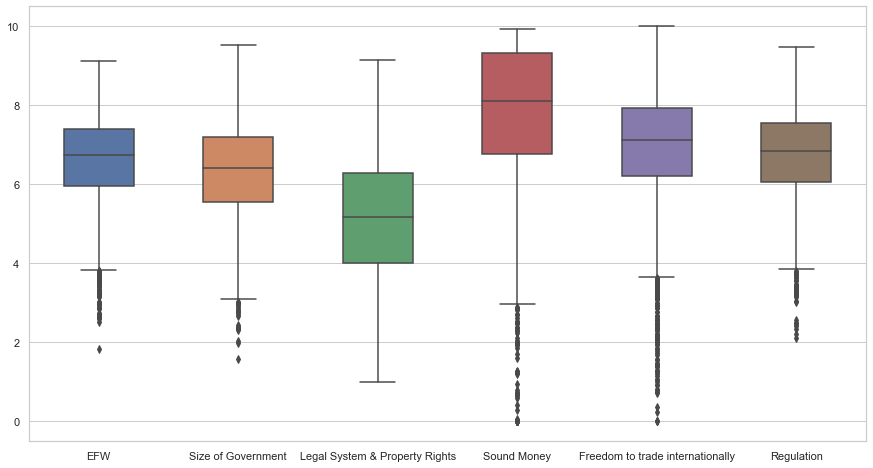

In [20]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=df[df.columns[3:]], width=0.5)

In [21]:
df.set_index(["Year", "Continent"], inplace=True)

# Need to sort before we are able to access the values via .loc[x, y]
df.sort_index(inplace=True)

### Finalized data format

In [22]:
df

Countries       EFW  Size of Government  \
Year Continent                                                   
1970 Africa                Kenya  4.823905            4.834159   
     Africa         South Africa  5.492169            5.177622   
     Africa              Tunisia  4.806738            4.939530   
     Asia              Hong Kong  8.667586            9.514193   
     Asia              Indonesia  4.157576            5.758931   
...                          ...       ...                 ...   
2017 South America      Paraguay  7.018513            8.303581   
     South America          Peru  7.496993            7.530163   
     South America      Suriname  6.687003            6.369250   
     South America       Uruguay  7.040992            6.320014   
     South America     Venezuela  2.585310            4.578746   

                    Legal System & Property Rights  Sound Money  \
Year Continent                                                    
1970 Africa                               4.869495     5.892088   
     Africa                               3.073866     7.155201   
     Africa                               2.882639     6.878062   
     Asia                                 7.979175     8.758219   
     Asia                                 3.351491     4.315554   
...                                            ...          ...   
2017 South America                        3.865900     9.429490   
     South America                        4.731270     9.720627   
     South America                        4.689002     7.235190   
     South America                        5.229383     9.035501   
     South America                        1.981339     0.692101   

                    Freedom to trade internationally  Regulation  
Year Continent                                                    
1970 Africa                                 2.563186    6.411138  
     Africa                                 7.285772    5.430164  
     Africa                                 3.439115    5.700371  
     Asia                                   8.205301    8.896033  
     Asia                                   3.465587    4.069913  
...                                              ...         ...  
2017 South America                          7.321868    6.171725  
     South America                          8.244446    7.258458  
     South America                          7.223320    7.918251  
     South America                          7.859995    6.760065  
     South America                          3.184232    2.490130  

[3030 rows x 7 columns]

In [23]:
df.loc[2000, 'Europe']['EFW'].mean()
# df.xs((1970, 'Europe'), level=('Year', 'Continent'))

7.264321917785079

In [24]:
car = df.index.get_level_values('Continent').unique()
car[2]

'Europe'

### Creating sub-dataframes of each attribute by continent (time series) for in-depth analysis

In [25]:
df.columns[1:]

Index(['EFW', 'Size of Government', 'Legal System & Property Rights',
       'Sound Money', 'Freedom to trade internationally', 'Regulation'],
      dtype='object')

In [26]:
# Create a dictionary of dataframes with the yearly average of each attribute (columns) grouped by CONTINENTS

cols = df.columns[1:]

# for c in cols:
#     print(c)
#     values = df[c].unique()
#     print(values)

# create a dictionary for each column by combining lists and names
lists = [[]for c in cols]
names = []
for name in cols:
    name = name.split(' ')[0]+'_dict'
    names.append(name)
# print(names)

# Dictionary no.1 before converting data to dataframe
cont_dict = {name: list for name, list in zip (names, lists)}
# print(cont_dict)
    
# fill empty lists with year average values of each column of each continent
continents = df.index.get_level_values('Continent').unique()
years = [x for x in range(2000, 2018)]

for c in cols:
#     print(c)
    for continent in continents:
        cont={}
        cont['Continent'] = continent
#         print(cont['Continent'])
        if continent != '':
            for year in years:
                cont['Year'] = year
                cont['Mean'] = df.loc[year, continent][c].mean()
#                 print('Mean of {} of {} in year {}: {}'.format(c, continent, year, df.loc[year, continent][c].mean()))
                c_tmp = c.split(' ')[0]+'_dict'
                cont_dict[c_tmp].append(cont.copy())

# print(cont_dict)

In [27]:
# Dictionary no.2 after converting dictionaries inside into dataframes
attributes = {}
for attribute in cont_dict:
    print(attribute)
    attributes[attribute] = pd.DataFrame(cont_dict[attribute])
#     attributes[attribute] = pd.DataFrame(cont_dict[attribute]).set_index(['Continent', 'Year']).sort_index()

EFW_dict
Size_dict
Legal_dict
Sound_dict
Freedom_dict
Regulation_dict


In [28]:
attributes['EFW_dict']

,Continent,Year,Mean
0,Africa,2000,5.688277
1,Africa,2001,5.710854
2,Africa,2002,5.741794
3,Africa,2003,5.801772
4,Africa,2004,5.776757
...,...,...,...
103,South America,2013,6.302733
104,South America,2014,6.212461
105,South America,2015,6.262712
106,South America,2016,6.268866


# 2. Exploratory Data Analysis

### Top and bottom 20 countries in terms of EFW in 2017

In 2017, Europe dominates the first twenty countries that have the highest EFW scores in the world, with nine countries from Europe,  followed by five from Asia. Fourteen out of the twenty countries with the lowest EFW scores are in Africa. Interestingly, four of the bottom group are also from Asia. We will have a closer look at the economies of Asia later on, but for now we compare the composition of European and African economies to see how they determine the EFW scores.

                    Countries       EFW
Continent                              
Asia                Hong Kong  8.909407
Asia                Singapore  8.693901
Oceania           New Zealand  8.501158
Europe            Switzerland  8.400176
North America   United States  8.196365
Europe                Ireland  8.131044
Europe         United Kingdom  8.092294
North America          Canada  8.084182
Oceania             Australia  8.071357
Africa              Mauritius  8.054997
Europe                  Malta  7.978555
Asia                  Georgia  7.927794
Europe                Denmark  7.886709
South America           Chile  7.874051
Europe                Estonia  7.873954
Europe              Lithuania  7.869567
Asia                    Japan  7.863200
Europe             Luxembourg  7.848376
Asia                   Taiwan  7.841510
Europe                Germany  7.810209
Europe           9
Asia             5
North America    2
Oceania          2
Africa           1
South America    1
Name: 

Text(0.5, 0, 'Number of Continent')

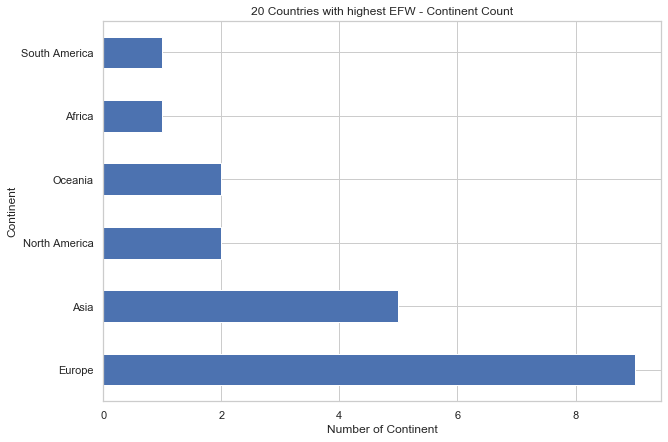

In [29]:
df_country = df.loc[2017].sort_values(by='EFW', ascending=False)
df_head = df_country.head(20)
df_tail = df_country.tail(20)

print(df_head[['Countries', 'EFW']])
print(df_head.index.get_level_values('Continent').value_counts())

df_head_count = df_head.index.get_level_values('Continent').value_counts()
ax = df_head_count.plot.barh(x='lab', y='val', figsize=(10,7))
ax.set_title('20 Countries with highest EFW - Continent Count')
ax.set_ylabel('Continent')
ax.set_xlabel('Number of Continent')

                              Countries       EFW
Continent                                        
Africa                         Ethiopia  5.730561
Asia                               Iran  5.710532
Africa                     Sierra Leone  5.708597
Africa                         Zimbabwe  5.699539
South America                 Argentina  5.665427
Asia                            Myanmar  5.613250
Africa                       Mozambique  5.572881
Africa                             Chad  5.439118
Asia                               Iraq  5.211021
Africa         Central African Republic  5.200118
Africa                    Guinea-Bissau  5.188876
Africa                   Congo, Rep. of  5.085998
Asia                              Syria  5.055289
Africa                            Egypt  5.045731
Africa                 Congo, Dem. Rep.  5.007639
Africa                           Angola  4.835438
Africa                          Algeria  4.763472
Africa                            Sudan  4.637553


Text(0.5, 0, 'Number of Continent')

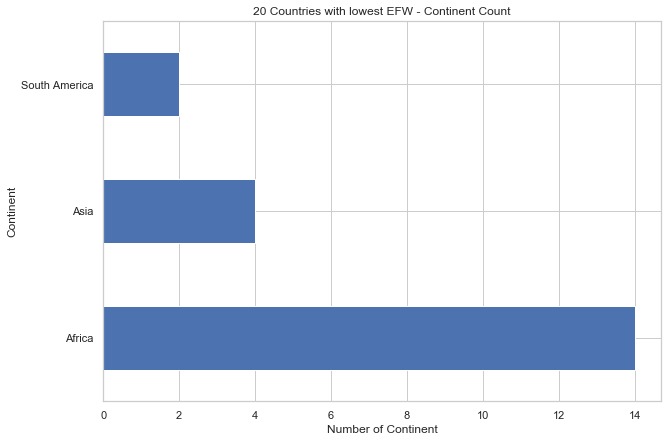

In [30]:
print(df_tail[['Countries', 'EFW']])
print(df_tail.index.get_level_values('Continent').value_counts())
df_tail_count = df_tail.index.get_level_values('Continent').value_counts()
ax = df_tail_count.plot.barh(x='lab', y='val', figsize=(10,7))
ax.set_title('20 Countries with lowest EFW - Continent Count')
ax.set_ylabel('Continent')
ax.set_xlabel('Number of Continent')

### Exploring correlation between variables

According to the correlation table below, Freedom to Trade Internationally has the highest correlation with EFW among other features, closely followed by Sound Money and Regulation. A graph representing each of these three features will be presented below. It is worth noting that correlation between features is generally low, hovering between 0.5 and 0.6. Size of the Government has relatively low correlation with all other features,

In [31]:
corr_df = pd.DataFrame(df.iloc[:, 1:]).astype(float)
corr_df.corr()

,EFW,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
EFW,1.000000,0.361567,0.757051,0.832180,0.869290,0.800045
Size of Government,0.361567,1.000000,-0.091235,0.182919,0.218196,0.205817
Legal System & Property Rights,0.757051,-0.091235,1.000000,0.511083,0.624640,0.587431
Sound Money,0.832180,0.182919,0.511083,1.000000,0.679103,0.566075
Freedom to trade internationally,0.869290,0.218196,0.624640,0.679103,1.000000,0.621491
Regulation,0.800045,0.205817,0.587431,0.566075,0.621491,1.000000


### Closer look into pairings - EFW

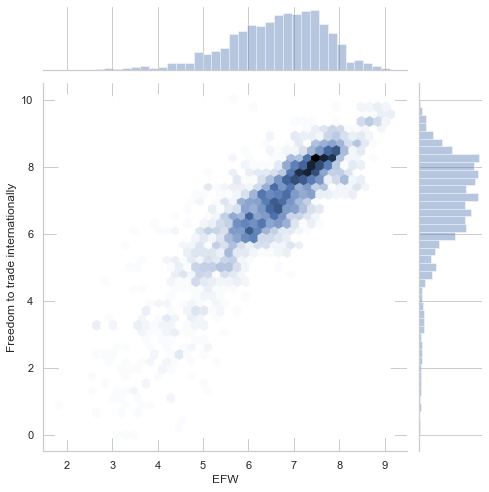

In [32]:
sns.jointplot(x="EFW", y="Freedom to trade internationally", data=df, kind="hex", height=7);

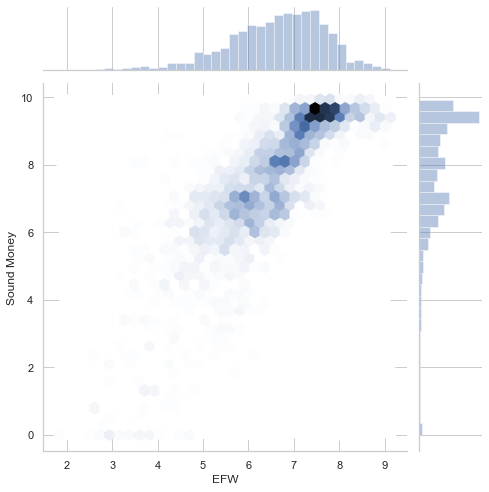

In [33]:
sns.jointplot(x="EFW", y="Sound Money", data=df, kind="hex", height=7);

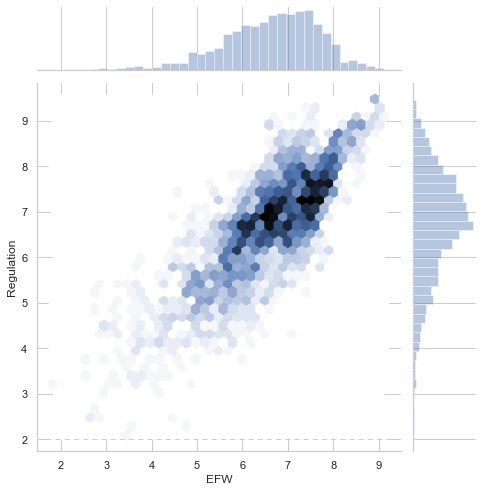

In [34]:
sns.jointplot(x="EFW", y="Regulation", data=df, kind="hex", height=7);

Interestingly, 'Size of Government' has a relatively low correlation with all other attributes

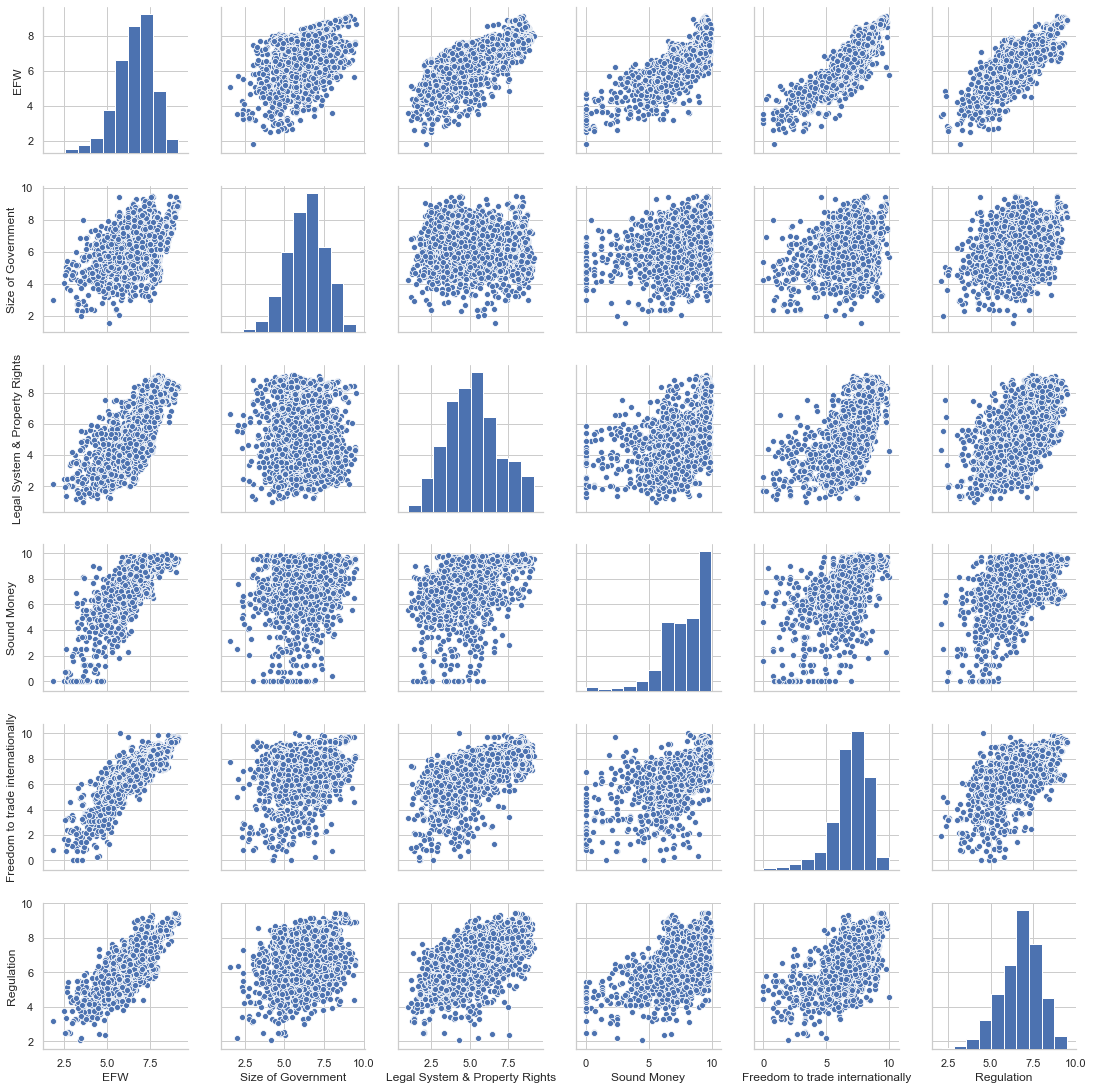

In [35]:
sns.pairplot(df)

### Time Series Analysis

The following figures represent the changes of the mean value of each feature overtime from year 2000 to 2017.

South America is the only continent that saw an overall decrease in EFW score, while both Asia and Africa experienced a significant growth in EFW score over the two decades. Size of Government has been extremely volatile among all continents, with the exception of Africa, which has remained relatively stable at around 6 points over the years. Legal System and Property Rights is the most consistently stable feature among all continents over the years. Although it is worth noting that Europe saw a slight dip while Africa has experienced growth in this area. Europe, Asia and Africa saw an improvement in Sound Money. There is a decreasing trend in all continents in Freedom to Trade Internationally, albeit at a very insignificant rate.

With the highest EFW score, Europe has a relatively small size of government, a robust legal system with property rights, an abundance of sound money and freedom to trade internationally, as well as a moderate level of regulation.

As a developing continent, Africa has experienced a significant improvement in all areas of economy. Although it still ranked the lowest in said areas, it is without doubt that at the rate that it is growing, it will soon overtake other continents as a powerful economy.

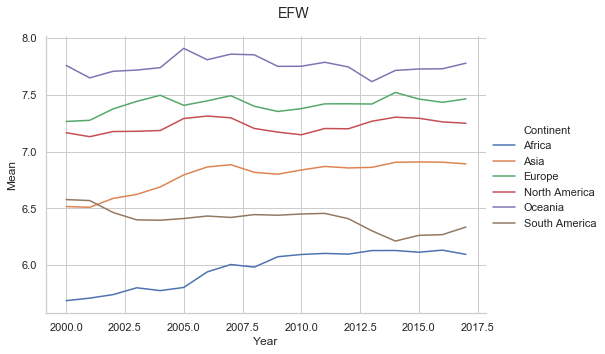

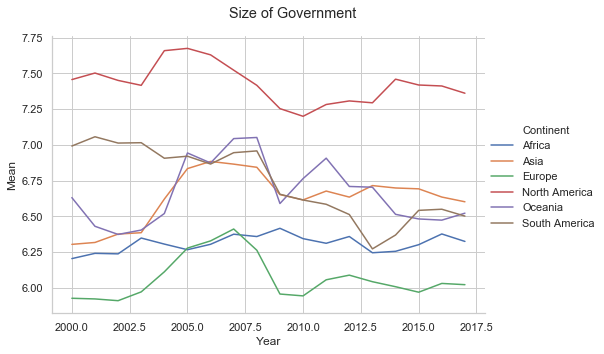

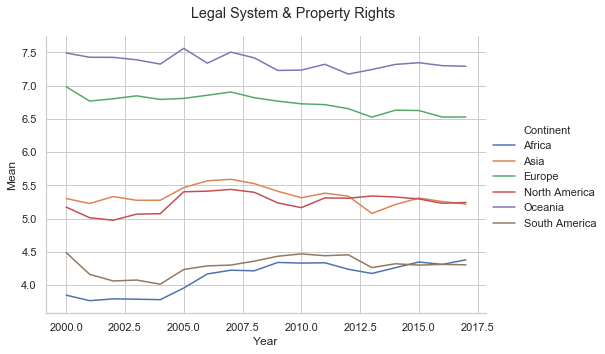

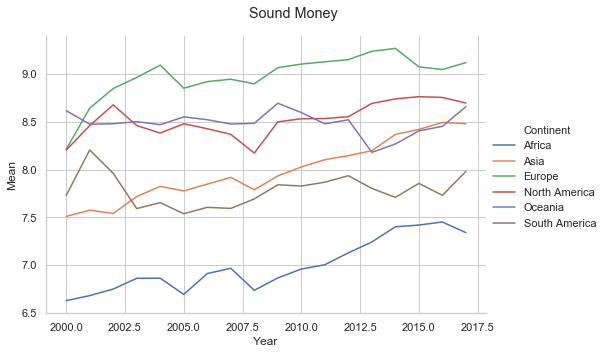

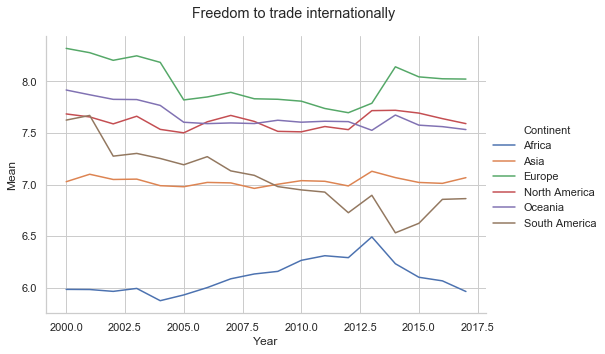

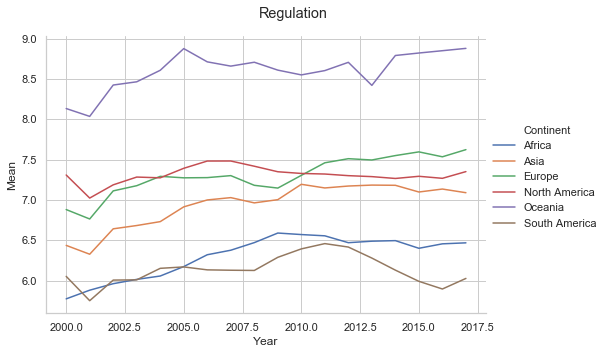

In [36]:
sig_cols = ['EFW_dict', 'Size_dict', 'Legal_dict', 'Sound_dict', 'Freedom_dict', 'Regulation_dict']
sig_cols_val = ['EFW', 'Size of Government', 'Legal System & Property Rights',
       'Sound Money', 'Freedom to trade internationally', 'Regulation']
sig_dict = {name: val for name, val in zip (sig_cols, sig_cols_val)}

for dict in ['EFW_dict', 'Size_dict', 'Legal_dict', 'Sound_dict', 'Freedom_dict', 'Regulation_dict']:
    data = attributes[dict]
    graph = sns.relplot(x="Year", y="Mean", ci=None, kind="line", hue = "Continent", data=data, height=5, aspect=11.7/8.27)
    graph.fig.suptitle(sig_dict[dict])
    graph.fig.subplots_adjust(top=.9)

### A Closer Look at Asia

As noted in previous sections, Asia has countries that score both the highest and lowest scores of EFW. Why is that the case? Let's have a look at the top and the bottom 5 Asian economies in terms of EFW. The following table shows that 4 out of 5 top countries are in Asia, whereas the bottom 5 countries are mostly in the Middle East. It is known that East Asia has experienced drastic growth in the late 20th century during the East Asian Miracle, and has remained strong economies since then. On the contrary, the Middle East has been politically and economically challenged by numerous unrests and upheavels in recent years. This explains the geographical disparity in economic performance, hence the big gap in EFW despite being in the same continent.

In [37]:
asia_df = df.xs(('Asia', 2017), level=('Continent', 'Year')).sort_values(by='EFW', ascending=False)
print(asia_df.head(5)['Countries'])
print(asia_df.tail(5)['Countries'])

Year  Continent
2017  Asia         Hong Kong
      Asia         Singapore
      Asia           Georgia
      Asia             Japan
      Asia            Taiwan
Name: Countries, dtype: object
Year  Continent
2017  Asia         Pakistan
      Asia             Iran
      Asia          Myanmar
      Asia             Iraq
      Asia            Syria
Name: Countries, dtype: object


Nevertheless, as shown in the graph below, economies at the bottom group in terms of EFW scores have seen a significant increase in economic freedom since the 1980s. There is a convergence in EFW scores between the countries with the highest and lowest economic freedom.

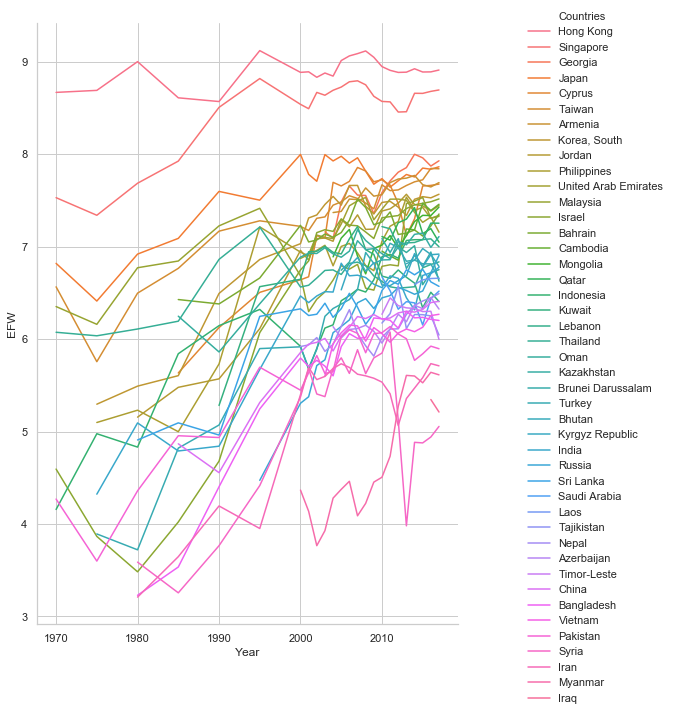

In [38]:
asia_df2 = df.xs(('Asia'), level=('Continent')).sort_values(by='EFW', ascending=False).reset_index()
# asia_df2 = asia_df2[asia_df2['Year'] >= 2000]

ax = sns.relplot(x="Year", y="EFW", hue="Countries",
                 data=asia_df2, kind="line")
ax.fig.set_size_inches(10,10)

In fact, most continents apart from South America are experiencing a convergence in EFW scores, as the disparities of economic freedom within each continent are shrinking overtime.

Continent
Africa           AxesSubplot(0.125,0.125;0.775x0.755)
Asia             AxesSubplot(0.125,0.125;0.775x0.755)
Europe           AxesSubplot(0.125,0.125;0.775x0.755)
North America    AxesSubplot(0.125,0.125;0.775x0.755)
Oceania          AxesSubplot(0.125,0.125;0.775x0.755)
South America    AxesSubplot(0.125,0.125;0.775x0.755)
Name: std, dtype: object

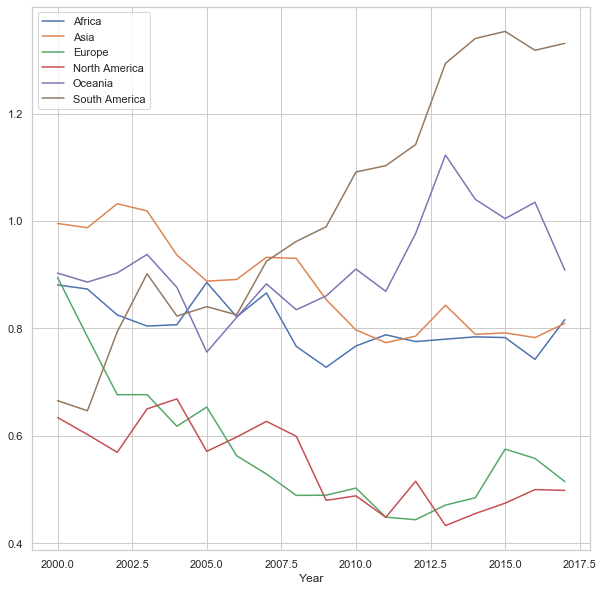

In [39]:
dum = []
for cont in df.index.get_level_values('Continent').unique():
    if cont != "":
        for year in range(2000, 2018):
            tmp = {}
            std = df.xs((year, cont), level=('Year', 'Continent'))['EFW'].std()
            tmp['Continent'] = cont
            tmp['Year'] = year
            tmp['std'] = std
            dum.append(tmp)
        
p_df = pd.DataFrame(dum)
# print(p_df)

p_df.set_index('Year', inplace=True)
p_df.groupby('Continent')['std'].plot(legend=True, figsize=[10, 10])

# 3. Predictive Analysis - Linear Regression

To investigate the impacts of the following features on EFW - Size of Government, Legal System & Property Rights, Sound Money, Freedom to trade internationally and Regulation, linear regression models are run with the data. Multiple models will be used, and the model with the best accuracy can help determine how much each feature can influence economic freedom, and provide pointers to policy-makers on which area to direct resources into.

In [40]:
regdf = df.reset_index()[df.columns[1:]]
regdf

,EFW,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
0,4.823905,4.834159,4.869495,5.892088,2.563186,6.411138
1,5.492169,5.177622,3.073866,7.155201,7.285772,5.430164
2,4.806738,4.939530,2.882639,6.878062,3.439115,5.700371
3,8.667586,9.514193,7.979175,8.758219,8.205301,8.896033
4,4.157576,5.758931,3.351491,4.315554,3.465587,4.069913
...,...,...,...,...,...,...
3025,7.018513,8.303581,3.865900,9.429490,7.321868,6.171725
3026,7.496993,7.530163,4.731270,9.720627,8.244446,7.258458
3027,6.687003,6.369250,4.689002,7.235190,7.223320,7.918251
3028,7.040992,6.320014,5.229383,9.035501,7.859995,6.760065


## Model 1: OLS

In [41]:
# Train Model

x = np.array(regdf.drop(['EFW'], 1))
y = np.array(regdf['EFW'])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [42]:
# Fit data into model and check accuracy

linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)

acc = linear.score(x_test, y_test) 
print(acc)

0.9980209410657104


In [43]:
# Printing coefficients

X = regdf.drop(['EFW'], 1)
coeff_df = pd.DataFrame(linear.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
Size of Government,0.201666
Legal System & Property Rights,0.204301
Sound Money,0.195892
Freedom to trade internationally,0.196309
Regulation,0.201681


In [44]:
# predictions

predictions = linear.predict(x_test) 

# for x in range(len(predictions)):
#     print(f'Predicted values: {predictions[x]}, True value: {y_test[x]}')

Text(0, 0.5, 'Predicted Y')

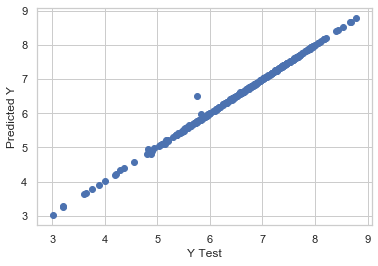

In [45]:
# Predicted VS True value

plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [46]:
# Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.011392580261091067
MSE: 0.0021618170673900526
RMSE: 0.046495344577603175


## 2. Ridge

In [47]:
# Ridge

x = np.array(regdf.drop(['EFW'], 1))
y = np.array(regdf['EFW'])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

ridge = linear_model.Ridge(alpha=.5)
ridge.fit(x, y)

acc = linear.score(x_test, y_test) 
print(acc)

0.9976992658650717


In [48]:
# Printing coefficients

X = regdf.drop(['EFW'], 1)
coeff_df = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
Size of Government,0.201881
Legal System & Property Rights,0.204248
Sound Money,0.196315
Freedom to trade internationally,0.195634
Regulation,0.202348


In [49]:
predictions = ridge.predict(x_test) 

# for x in range(len(predictions)):
#     print(f'Predicted values: {predictions[x]}, True value: {y_test[x]}')

In [50]:
# Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.014903309712962259
MSE: 0.0025609972474579805
RMSE: 0.05060629651987962


## 3. Lasso

In [51]:
x = np.array(regdf.drop(['EFW'], 1))
y = np.array(regdf['EFW'])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

lasso = linear_model.Lasso(alpha=.5)
lasso.fit(x, y)

acc = lasso.score(x_test, y_test) 
print(acc)

0.8010787557718384


In [52]:
# Printing coefficients

X = regdf.drop(['EFW'], 1)
coeff_df = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
Size of Government,0.000000
Legal System & Property Rights,0.113917
Sound Money,0.204873
Freedom to trade internationally,0.156832
Regulation,0.000000


In [53]:
predictions = lasso.predict(x_test) 

# for x in range(len(predictions)):
#     print(f'Predicted value: {predictions[x]}, True value: {y_test[x]}')

In [54]:
# Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3745409163387053
MSE: 0.25408651724380216
RMSE: 0.5040699527285892


## 4. Elastic Net

In [55]:
x = np.array(regdf.drop(['EFW'], 1))
y = np.array(regdf['EFW'])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

elastic = linear_model.ElasticNet(alpha=.5)
elastic.fit(x, y)

acc = elastic.score(x_test, y_test) 
print(acc)

0.9105946214428307


In [56]:
# Printing coefficients

X = regdf.drop(['EFW'], 1)
coeff_df = pd.DataFrame(elastic.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
Size of Government,0.044647
Legal System & Property Rights,0.143663
Sound Money,0.199455
Freedom to trade internationally,0.180798
Regulation,0.094456


In [57]:
predictions = lasso.predict(x_test) 

# for x in range(len(predictions)):
#     print(f'Predicted value: {predictions[x]}, True value: {y_test[x]}')

In [58]:
# Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.37596680750631833
MSE: 0.23348458733870067
RMSE: 0.4832024289453652


### Model Evaluation and Analysis

Amongst the four models above, Ridge regression performs with the best accuracy, while Lasso regression returns results with the least precision. Considering that the variables are not highly correlated with one another (as discussed in Exploratory Data Analysis), there is no need for feature selection, which Lasso normally does. Ordinary Least Square performs only marginally worse than Ridge Regression. Both return similar prediction, and suggest that each of the variable has a coefficient of around 0.19 or 0.2. In other words, an increase in 1 point of each variable, say Sound Money, will raise the EFW score by 0.2 points. Considering there are five features in total, their effects on the EFW score are evenly distributed. To rank the importance of each variable according to their miniscule differences, Legal System & Property Rights ranks the highest in influencing EFW, followed closely by Regulation, then Size of Government, and finally Sound Money, as well as Freedom to Trade Internationally.